[Scikit-learn で線形回帰](https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e) に記載されているコードを実際に手を動かしながら実行していく

### 線形回帰モデル

線形回帰分析にはLinearRegressionモデルを使用する。

主に使用するメソッド

*  `fit` メソッド：線形モデルの重みを学習
* `predict` メソッド：線形モデルから目的変数を予測
* `score` メソッド：線形モデルがどの程度目的変数を出力

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

import pandas as pd
boston_df = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df['MEDV'] = boston.target

今回使用するボストンの地域別住宅価格のデータを出力する

In [2]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


データ項目の説明

* CRIM：犯罪発生率
* ZN：25000平方フィート以上の住宅区画の割合
* INDUS：非小売業種の土地面積の割合
* CHAS：チャールズ川沿いかを表すダミー変数
* NOX：窒素酸化物の濃度
* RM：平均部屋数
* AGE：1940年より前に建てられた建物の割合
* DIS：5つのボストンの雇用施設への重み付き距離
* RAD：高速道路へのアクセスのしやすさ
* TAX：10000ドルあたりの不動産税率
* PTRATIO：生徒と教師の割合
* B：黒人の割合
* LSTAT：低所得者の割合
* MEDV：住宅価格の中央値

RM：平均部屋数とMEDV：住宅価格の関係を見る

<function matplotlib.pyplot.show(close=None, block=None)>

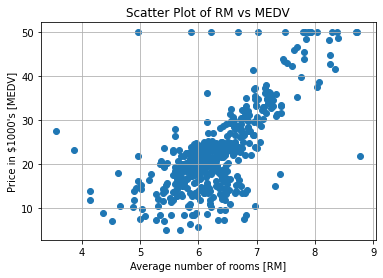

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(boston_df["RM"], boston_df["MEDV"])

plt.title("Scatter Plot of RM vs MEDV")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Price in $1000\'s [MEDV]")
plt.grid()

plt.show

Pandasのcorrメソッドで平均部屋数と住宅価格の相関係数を算出する

In [4]:
boston_df[["RM", "MEDV"]].corr()

,RM,MEDV
RM,1.00000,0.69536
MEDV,0.69536,1.00000


RMとMEDVの間には、相関係数が0.69536、つまり約0.7程度の正の相関があることが分かった

### 線形回帰モデルの構築

`fit` メソッドで重みを学習することで、線形回帰モデルを構築する。

In [5]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

X = boston_df[["RM"]].values
Y = boston_df["MEDV"].values

lr.fit(X,Y)

LinearRegression()

学習で得られた、線形モデルの切片 `w0` は `intercept_` 属性に、説明変数の係数 `w1` は`coef_` 属性に格納される。実際に確認する。

In [6]:
print('coefficient = ', lr.coef_[0])
print('intercept = ', lr.intercept_)

coefficient =  9.10210898118031
intercept =  -34.67062077643857


学習で得られた切片と係数を利用して、回帰直線を引く。

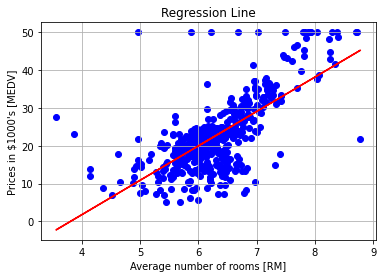

In [7]:
plt.scatter(X, Y, color = 'blue')
plt.plot(X, lr.predict(X), color = 'red')

plt.title("Regression Line")
plt.xlabel("Average number of rooms [RM]")
plt.ylabel("Prices in $1000\'s [MEDV]")
plt.grid()

plt.show()

### 回帰モデルの性能評価

以下のコードでは、 `model_selection` の `train_test_split` を利用して、データを学習用と検証用に7:3の割合で分割し、学習データを用いて線形モデルを構築する。

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, test_size = 0.3, random_state = 0)

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

線形回帰モデルの性能評価には以下の方法・指標を利用する

* 残差プロット：残差(=目的変数の真値と予測値の差分)を可視化
* 平均二乗誤差：残差平方和をデータ数で正規化した値
* 決定係数：相関係数の二乗

予測精度の良い線形モデルの残差プロットは、0を中心にばらついたものになる。残差プロットに何かパターンが見られる場合は線形モデルで説明しきれない情報があることが示唆される。

以下のコードは残差プロットを描画する

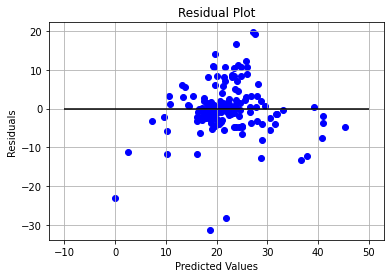

In [9]:
Y_pred = lr.predict(X_test)

plt.scatter(Y_pred, Y_pred - Y_test, color = 'blue')
plt.hlines(y = 0, xmin = -10, xmax = 50, color = 'black')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()

plt.show()

平均二乗誤差は、残差の平方和をデータ数で正規化したものであり、モデルの性能を数値化するのに役立つ。誤差が小さいほどモデルの性能はよいといえる。平均二乗誤差は `metrics` の `mean_squared_error` を利用することで算出できる。

In [10]:
from sklearn.metrics import mean_squared_error

Y_train_pred = lr.predict(X_train)
print("MSE train data: ", mean_squared_error(Y_train, Y_train_pred))
print("MSE test data: ", mean_squared_error(Y_test, Y_pred))

MSE train data:  42.15765086312224
MSE test data:  47.03304747975518


学習データ、検証データのそれぞれを用いた時の平均二乗誤差を比較すると、検証データを用いた時の誤差のほうが大きい。このことから、構築した線形モデルは学習データにフィットしすぎている(= 過学習している)ことが示唆される。

決定係数も、線形モデルの予測誤差を反映した指標で、値が大きいほど線形モデルがデータにフィットしているといえる。決定係数は `metrics` の `r2_score` を利用することで算出できる。また、 `LinearRegression` モデルの `score` メソッドでも算出できる。

In [13]:
from sklearn.metrics import r2_score

print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))

r^2 train data:  0.5026497630040827
r^2 test data:  0.43514364832115193


学習データ、検証データのそれぞれを用いた時の決定係数を比較すると、検証データを用いた時のほうが小さい。このことから、構築した線形モデルには過学習が起こっている可能性がある。